## MACHINE LEARNING 7, 8, 9, 10 & 11

#### MACHINE LEARNING 7 to 11: Assignment

### Problem Statement: Machine Learning 7

In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

A look at the data

Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:

https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:
    
    player - name of the player
    
    pos - the position of the player
    
    g - number of games the player was in
    
    gs - number of games the player started
    
    pts - total points the player scored

There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

We can read our dataset in and figure out which columns are present:

    import pandas

    with open("nba_2013.csv", 'r') as csvfile:

    nba = pandas.read_csv(csvfile)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error ,r2_score
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [7]:
#Reading data from downloaded CSV file.
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

#### Data Exploration

In [8]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [10]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [11]:
nba.shape

(481, 31)

In [12]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [13]:
nba.isnull().values.any()

True

In [14]:
total = nba.isnull().sum().sort_values(ascending=False)
percent_1 = nba.isnull().sum()/nba.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
x3p.,67,13.9
ft.,20,4.2
x2p.,3,0.6
fg.,2,0.4
efg.,2,0.4
x2p,0,0.0
pos,0,0.0
age,0,0.0
bref_team_id,0,0.0
g,0,0.0


There are missing values in the data - x3p, ft, x2p, fg and efg columns

#### Data Imputation

In [18]:
#Replacing null values with '0'
nba_new = nba.fillna(0)

In [19]:
nba_new.isnull().values.any()

False

In [20]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

In [21]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

In [23]:
# Since there is no variation in the data for features 'season' and 'season_end', these can be dropped as they will have no impact on predictions

feat_list_obj = []
for i in nba.columns:
    if nba[i].dtype == 'object':
        feat_list_obj.append(i)

In [24]:
feat_list_obj

['player', 'pos', 'bref_team_id', 'season']

In [25]:
# Prepare the list of features to be dropped from the Features to be used to train the model

feat_drop_list = feat_list_obj + ['season_end','pts']
feat_drop_list

['player', 'pos', 'bref_team_id', 'season', 'season_end', 'pts']

In [26]:
Features = nba.drop(feat_drop_list,axis=1)
Labels = nba['pts'] #### to make predictions for pts hence used as label
print(Features.shape)
print(Labels.shape)

(481, 25)
(481,)


In [27]:
# There are missing values in columns - x3p, ft, x2p, fg & efg. We'll replace missing values with corresponding feature's median value.

imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(Features) # Independent Variable
Y = Labels.values # Dependent Values

In [28]:
 Features.shape,X.shape,Y.shape

((481, 25), (481, 25), (481,))

#### Data visualization

In [31]:
Sample = Features.dropna()

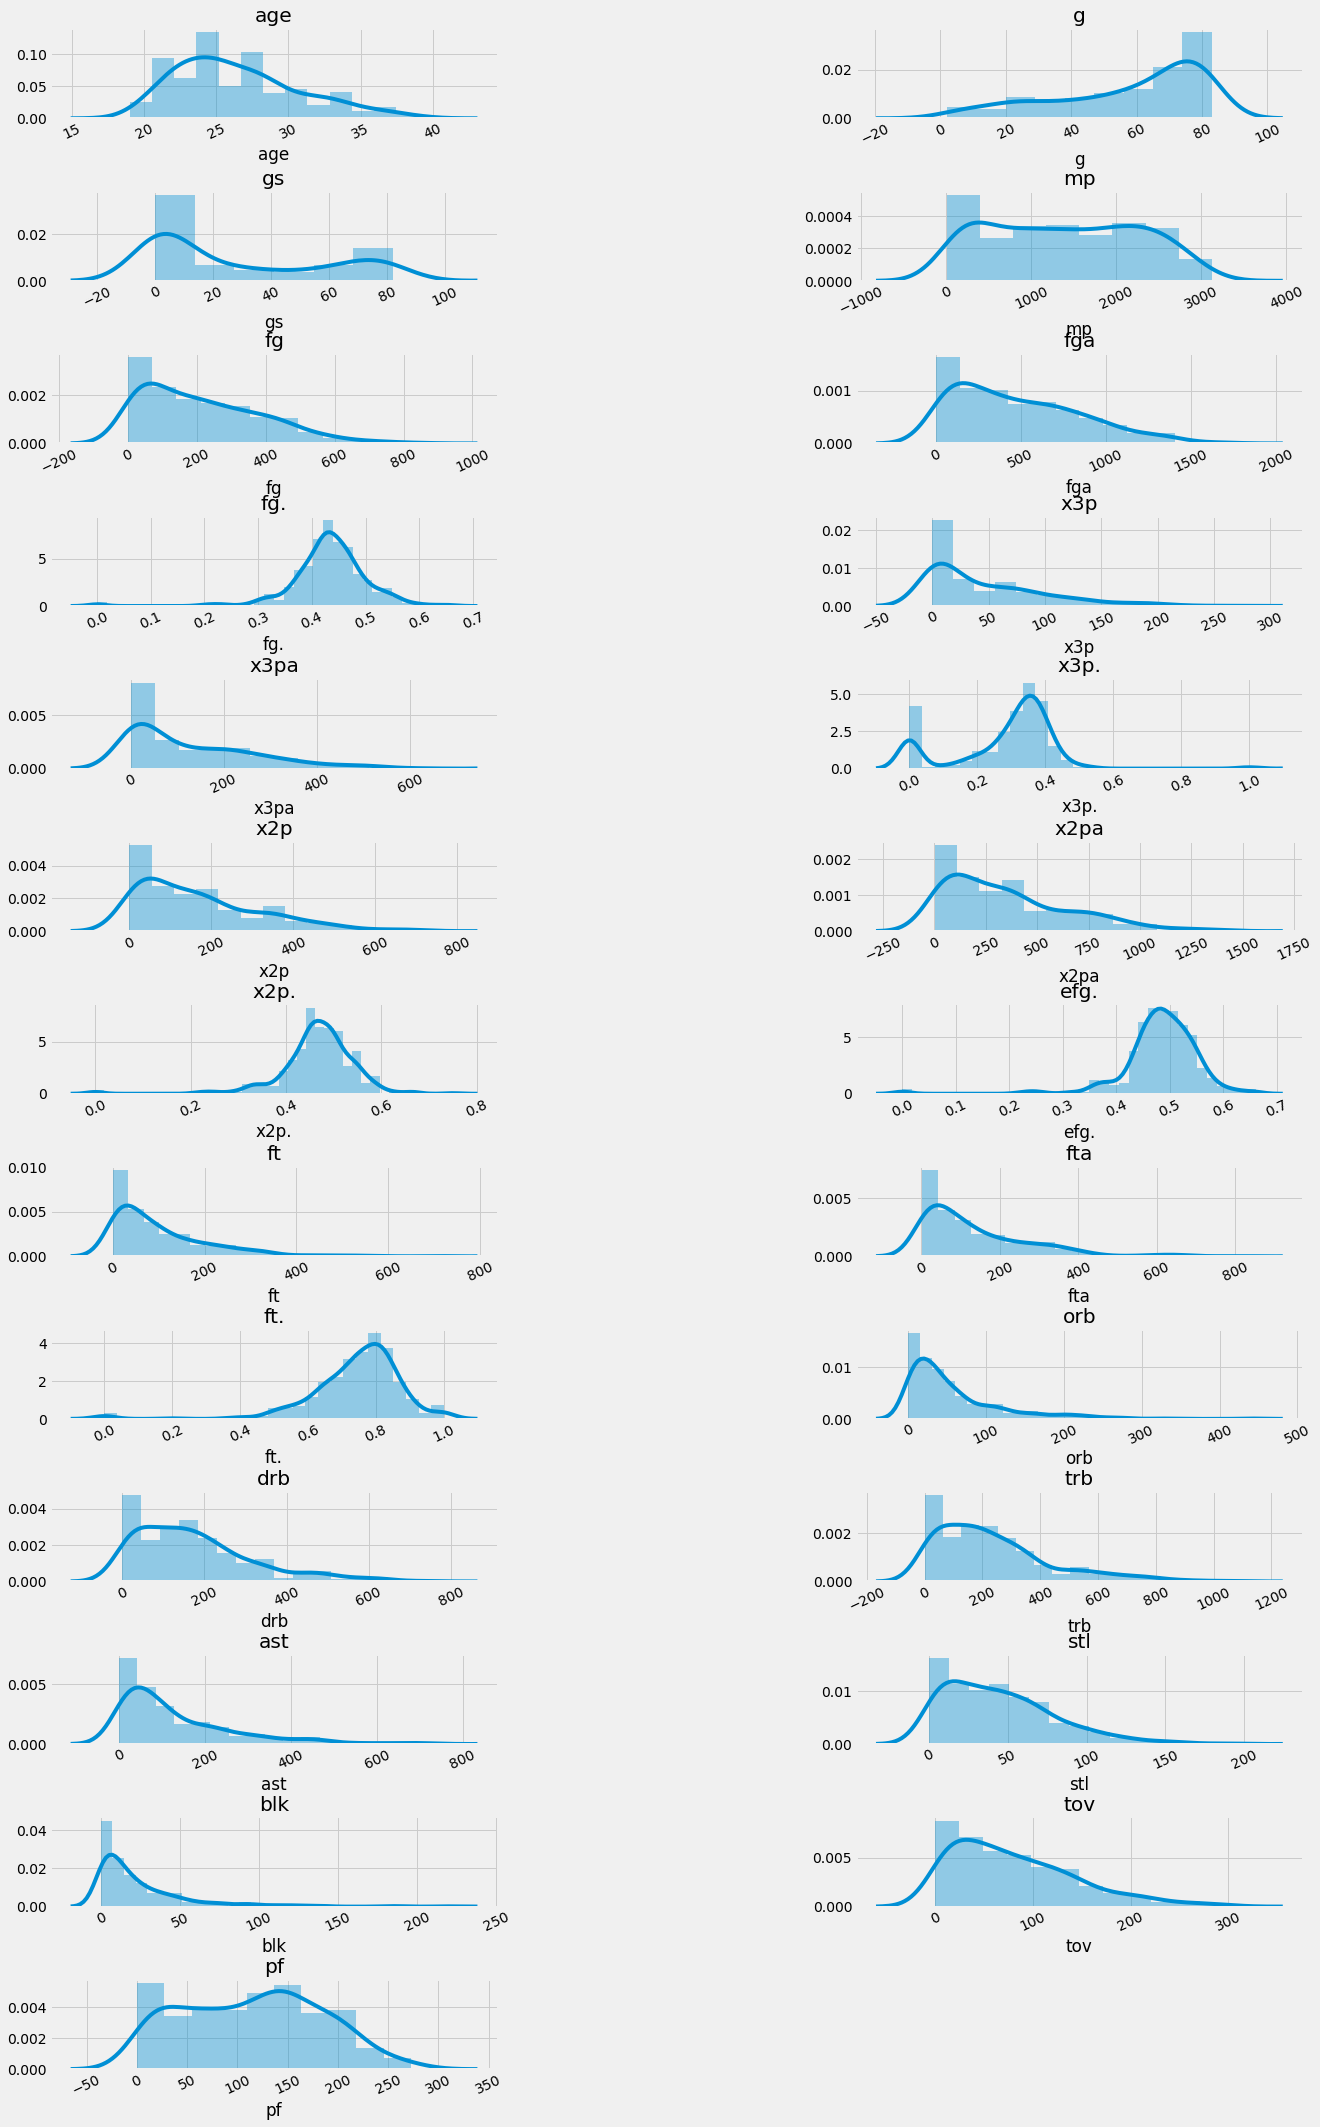

In [32]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            # plt.show()
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
            # plt.show()
plot_distribution(Sample, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

In [33]:
# Split the sample data to 'test' and 'train' data sets

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(384, 25)
(97, 25)
(384,)
(97,)


In [34]:
sns.set_style('whitegrid')
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value )
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)

RMSE is  109.68530429999018  for K-Value: 1
RMSE is  94.71292762761487  for K-Value: 2
RMSE is  97.62527417669874  for K-Value: 3
RMSE is  96.14675812495263  for K-Value: 4
RMSE is  83.29922710994022  for K-Value: 5
RMSE is  83.0387801177042  for K-Value: 6
RMSE is  88.7759207605298  for K-Value: 7
RMSE is  94.66335241236945  for K-Value: 8
RMSE is  97.96931606717861  for K-Value: 9
RMSE is  103.49740471869406  for K-Value: 10
RMSE is  106.19503735548705  for K-Value: 11
RMSE is  109.1873993323716  for K-Value: 12
RMSE is  107.77454037244564  for K-Value: 13
RMSE is  111.39746743105337  for K-Value: 14
RMSE is  114.8307391265033  for K-Value: 15
RMSE is  117.52106033156859  for K-Value: 16
RMSE is  120.39243270163412  for K-Value: 17
RMSE is  121.85591429029819  for K-Value: 18
RMSE is  123.26325728524043  for K-Value: 19
RMSE is  126.47912331298244  for K-Value: 20


In [35]:
# It shows that we are getting less error for values of K = 5 & 6

K_value = 6
neigh = KNeighborsRegressor(n_neighbors = K_value)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
print("RMSE for KNN Regressor is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for K-Value:",K_value)
print("R Squared for KNN Regressor is ",r2_score(Y_test,Y_pred))

RMSE for KNN Regressor is  83.0387801177042  for K-Value: 6
R Squared for KNN Regressor is  0.9748342374517244


In [36]:
# R Squared is a statistical measure of how close the data points are to their fitted regression line

Text(0.5, 1, 'Actual vs Predicted points')

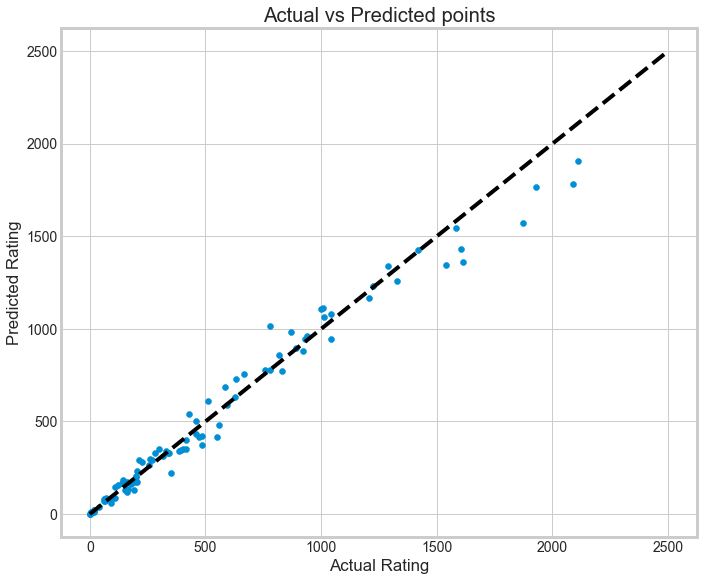

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points")

In [38]:
# Applying Random Forest Regressor to predict NBA players score

from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(random_state=1)
RFreg.fit(X_train,Y_train)
Y_pred = RFreg.predict(X_test)
print("RMSE for Random Forest Regressor is ",np.sqrt(mean_squared_error(Y_pred,Y_test)))
print("R Squared for Random Forest Regressor is ",r2_score(Y_test,Y_pred))

RMSE for Random Forest Regressor is  47.194587318515126
R Squared for Random Forest Regressor is  0.9918710854350188


Text(0.5, 1, 'Actual vs Predicted points- Random Forest Regressor')

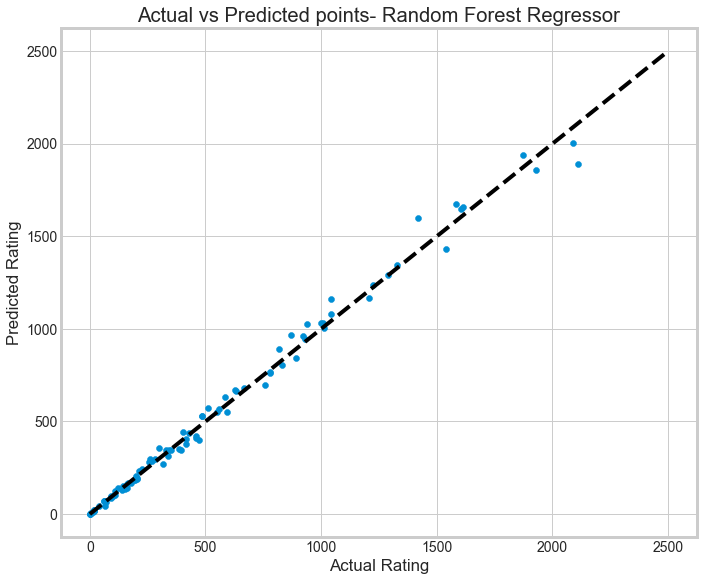

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 2500], [0, 2500], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted points- Random Forest Regressor")

In [40]:
for depth in range(30):
    depth = depth + 1
    RFreg = RandomForestRegressor(max_depth=depth,random_state=1)
    RFreg.fit(X_train,Y_train)
    Y_pred = RFreg.predict(X_test)
    print("RMSE is ",np.sqrt(mean_squared_error(Y_pred,Y_test))," for max_depth ",depth)

RMSE is  283.5815729141861  for max_depth  1
RMSE is  149.25928520064966  for max_depth  2
RMSE is  77.18244069075112  for max_depth  3
RMSE is  67.99419414505138  for max_depth  4
RMSE is  49.91505147709011  for max_depth  5
RMSE is  49.1093129791732  for max_depth  6
RMSE is  55.8707383790166  for max_depth  7
RMSE is  45.12073435121306  for max_depth  8
RMSE is  55.05631767687581  for max_depth  9
RMSE is  41.51120524329299  for max_depth  10
RMSE is  49.456626628564806  for max_depth  11
RMSE is  42.408358444761575  for max_depth  12
RMSE is  47.194587318515126  for max_depth  13
RMSE is  47.194587318515126  for max_depth  14
RMSE is  47.194587318515126  for max_depth  15
RMSE is  47.194587318515126  for max_depth  16
RMSE is  47.194587318515126  for max_depth  17
RMSE is  47.194587318515126  for max_depth  18
RMSE is  47.194587318515126  for max_depth  19
RMSE is  47.194587318515126  for max_depth  20
RMSE is  47.194587318515126  for max_depth  21
RMSE is  47.194587318515126  for 

#### Evaluating the model

The R Squared for KNN Regressor is 0.974834237452

The R Squared for Random Forest Regressor is 0.991871085435

R Squared is a statistical measure of how close the sample data points are to the fitted regression line. As also evident from the plot Random Forest Regressor gives a better prediction for the NBA players score as the data point
are more fitted to the regression line compared to that of KNN Regressor